In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-26 19:16:45.312544: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 19:16:45.345540: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 19:16:45.805973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
df_desagregar = pd.DataFrame(df[['Ano','Polvo_art','Polvo_ind','Polvo_art_ind','TOTAL_MOLLUSCS']])

#Juntando valores de art e ind em art_ind(quando os 2 estão presentes) 
  #Polvo
for i in range(len(df_desagregar['Ano'])):
  if pd.isnull(df_desagregar.iloc[i,3])==True and pd.isnull(df_desagregar.iloc[i,2])==False and pd.isnull(df_desagregar.iloc[i,1])==False:
    df_desagregar.iloc[i,3] = df_desagregar.iloc[i,2] + df_desagregar.iloc[i,1] 

dados = df_desagregar[['Ano','Polvo_art_ind','TOTAL_MOLLUSCS']].dropna().reset_index(drop=True)

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Polvo'] = dados.loc[i,'Polvo_art_ind'] / dados.loc[i,'TOTAL_MOLLUSCS']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1969,1970,1971,1972,1973,1974,1975,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()


prop = dados['Prop_Polvo'].values
dados.head()

,Ano,Polvo_art_ind,TOTAL_MOLLUSCS,Prop_Polvo
0,1962,2.0,38.0,0.052632
1,1963,3.0,141.0,0.021277
2,1964,20.0,708.0,0.028249
3,1966,9.0,75.0,0.120000
4,1967,16.0,145.0,0.110345


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [9]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=150, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/pesos prop polvos GASTAO/.weights.h5', overwrite=True)

Epoch 1/150


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - loss: 1.0151
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9772
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9486
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9181
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8832
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8426
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7952
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7402
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6779
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6098
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5382
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4659
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3970
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3382
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2976
Epoch 16/150
1/1 ━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/pesos prop polvos GASTAO/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.04203324]
 [0.0438114 ]
 [0.04558988]
 [0.04737996]
 [0.04917233]
 [0.05096468]
 [0.05276521]
 [0.05457439]
 [0.05638703]
 [0.05820007]
 [0.0600221 ]
 [0.06213306]
 [0.07126573]
 [0.07716846]
 [0.07516161]
 [0.07297673]
 [0.07076655]
 [0.06857289]
 [0.06638253]
 [0.064243  ]
 [0.06210286]
 [0.05995698]]


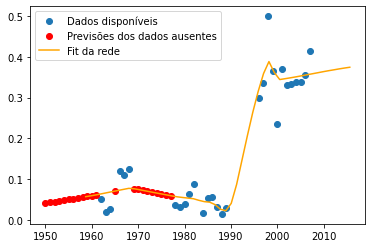

In [10]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

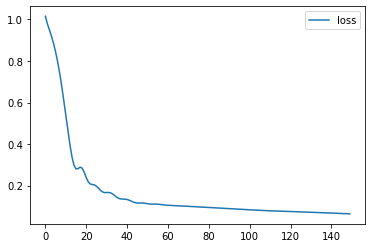

In [11]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [12]:
#Lista todos_anos normalizada e sua predição     (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Polvo',prev_continua)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
